In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
retrieve_file_path = os.path.join('data', 'temp', 'baseline_rag_result_R3_retrieved_faithfulness.csv')
rerank_file_path = os.path.join('data', 'temp', 'baseline_rag_result_R3_reranked_faithfulness.csv')

In [3]:
retrieve_df = pd.read_csv(retrieve_file_path)
retrieve_df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,faithful_score,faithful_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成創作者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,0.0,NO
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),抱歉，無法提供該工具的資訊。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,0.0,NO
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),沒有提到任何軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,1.0,YES


In [4]:
retrieve_df = retrieve_df[['faithful_score', 'faithful_feedback']].copy()
retrieve_df.columns = ['retrieve_faithful_score', 'retrieve_faithful_feedback']
retrieve_df.head(3)

,retrieve_faithful_score,retrieve_faithful_feedback
0,0.0,NO
1,0.0,NO
2,1.0,YES


In [5]:
rerank_df = pd.read_csv(rerank_file_path)
rerank_df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,faithful_score,faithful_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成創作者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,0.0,NO
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),抱歉，無法提供該工具的資訊。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,0.0,NO
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),沒有提到任何軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,1.0,YES


In [6]:
rerank_df = rerank_df[['faithful_score', 'faithful_feedback']].copy()
rerank_df.columns = ['rerank_faithful_score', 'rerank_faithful_feedback']
rerank_df.head(3)

,rerank_faithful_score,rerank_faithful_feedback
0,0.0,NO
1,0.0,NO
2,1.0,YES


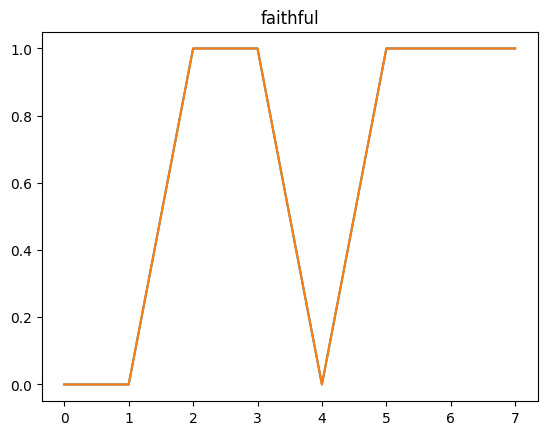

In [7]:
rerank_scores = rerank_df['rerank_faithful_score'].tolist()
retrieve_scores = retrieve_df['retrieve_faithful_score'].tolist()
plt.title('faithful')
plt.plot(rerank_scores)
plt.plot(retrieve_scores)